**Due: 4 PM on Wednesday, 13 Apr 2016**

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

For this exercise, the most important grading criteria is how much your optimizations improved run-times.

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc. is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Exercise 1 (100 points)**

The code given below performs a stochastic gradient descent to fit a quadratic polynomila to $n$ data points. Maake the code run faster by:

1. Using `numba` JIT  (20 points)
1. using `Cython` (30 poits)
1. Rewrite the `sgd` function in C or C++ and wrap for use in Python (50 points)

Replace the code stubs below with your otpimized code. Reprot the ratio optimized_time/original_time for each of the four parts.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def sgd(b, x, y, max_iter, alpha):
    n = x.shape[0]
    for i in range(max_iter):
        for j in range(n):
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[2] -= alpha * (2*x[j]**2 * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
    return b

In [47]:
np.random.seed(12345)
n = 10000
x = np.linspace(0, 10, n)
y = 2*x**2 + 6*x + 3 + np.random.normal(0, 5, n)
k = 100
alpha = 0.00001
b0 = np.random.random(3)

In [48]:
%%time
np.random.seed(123)
b = sgd(b0, x, y, k, alpha)
print(b)

[  9.67934503e+00   7.71388025e-04   2.53519494e+00]
CPU times: user 5.92 s, sys: 0 ns, total: 5.92 s
Wall time: 5.94 s


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


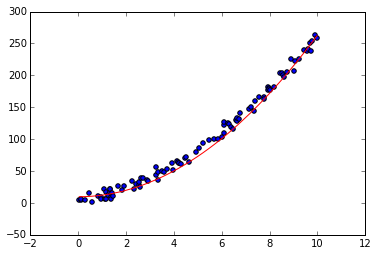

In [49]:
yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass

### Using numba JIT

In [17]:
from numba import jit

In [50]:
@jit
def sgd_numba(b, x, y, max_iter, alpha):
    n = x.shape[0]
    for i in range(max_iter):
        for j in range(n):
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[2] -= alpha * (2*x[j]**2 * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
    return b

In [51]:
%%time
np.random.seed(123)
b = sgd_numba(b0, x, y, k, alpha)
print(b)

[  9.82084322e+00   7.71416420e-04   2.53377882e+00]
CPU times: user 223 ms, sys: 3.77 ms, total: 227 ms
Wall time: 228 ms


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


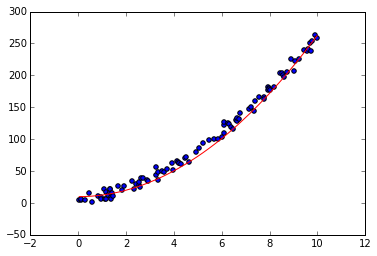

In [52]:
yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass

#### Speed-up ratio

### Using Cython

In [53]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [56]:
%%cython -a

import numpy as np
cimport numpy as np
import cython
from libc.math cimport pow

@cython.boundscheck(False)
@cython.wraparound(False)
def sgd_cython(double[:] b, double[:] x, double[:] y, int max_iter, double alpha):
    cdef int i, j
    cdef int n = x.shape[0]
    for i in range(max_iter):
        for j in range(n):
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*pow(x[j], 2) - y[j]))
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*pow(x[j], 2) - y[j]))
            b[2] -= alpha * (2*pow(x[j], 2) * (b[0] + b[1]*x[j] + b[2]*pow(x[j], 2) - y[j]))
    return np.array(b)

/opt/conda/lib/python3.4/site-packages/IPython/utils/path.py:264: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module
  warn("get_ipython_cache_dir has moved to the IPython.paths module")


In [57]:
%%time
np.random.seed(123)
b = sgd_cython(b0, x, y, k, alpha)
print(b)

[  9.82306353e+00   7.71416866e-04   2.53375660e+00]
CPU times: user 28.7 ms, sys: 166 µs, total: 28.9 ms
Wall time: 28.5 ms


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


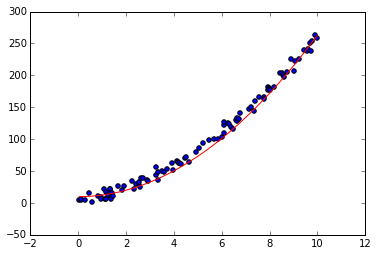

In [58]:
yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass

#### Speed-up ratio

### Using C or C++

In [59]:
%%file sgd.h

#pragma once
void sgd(double *b, double *x, double *y, int max_iter, double alpha, int n);

Overwriting sgd.h


In [60]:
%%file sgd.c
#include "sgd.h"
#include <math.h>

void sgd(double *b, double *x, double *y, int max_iter, double alpha, int n) {
    for (int i=0; i<max_iter; i++) {
        for (int j=0; j<n; j++) {
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*pow(x[j], 2) - y[j]));
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*pow(x[j], 2) - y[j]));
            b[2] -= alpha * (2*pow(x[j], 2) * (b[0] + b[1]*x[j] + b[2]*pow(x[j], 2) - y[j]));
        }
    }
}

Overwriting sgd.c


In [61]:
%%file sgd_wrap.pyx

cdef extern from 'sgd.h':
    void sgd(double *b, double *x, double *y, int max_iter, double alpha, int n)
    
def sgd_wrap(double[::1] b0, double[::1] x, double[::1] y, int max_iter, double alpha):
    sgd(&b0[0], &x[0], &y[0], max_iter, alpha, len(y))
    return b0


Overwriting sgd_wrap.pyx


In [62]:
%%file setup.py 
from distutils.core import setup, Extension
from Cython.Build import cythonize

ext = Extension("sgd_wrap",
                sources=["sgd_wrap.pyx", "sgd.c"],
                libraries=["m"],
                extra_compile_args=["-std=c99"])

setup(
    ext_modules = cythonize(
            ext
    ))

Overwriting setup.py


In [63]:
! python setup.py build_ext --inplace

Compiling sgd_wrap.pyx because it changed.
Cythonizing sgd_wrap.pyx
running build_ext
building 'sgd_wrap' extension
gcc -pthread -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/include/python3.4m -c sgd_wrap.c -o build/temp.linux-x86_64-3.4/sgd_wrap.o -std=c99
gcc -pthread -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/include/python3.4m -c sgd.c -o build/temp.linux-x86_64-3.4/sgd.o -std=c99
gcc -pthread -shared -L/opt/conda/lib -Wl,-rpath=/opt/conda/lib,--no-as-needed build/temp.linux-x86_64-3.4/sgd_wrap.o build/temp.linux-x86_64-3.4/sgd.o -L/opt/conda/lib -lm -lpython3.4m -o /home/jovyan/work/sta-663-2016/homework/sgd_wrap.cpython-34m.so


In [64]:
from sgd_wrap import sgd_wrap

In [65]:
%%time
np.random.seed(123)
b = sgd_wrap(b0, x, y, k, alpha)
print(np.array(b))

[  9.82309837e+00   7.71416873e-04   2.53375625e+00]
CPU times: user 32.2 ms, sys: 34 µs, total: 32.2 ms
Wall time: 35.1 ms


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


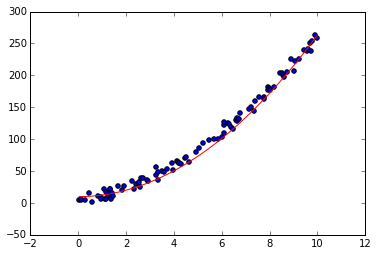

In [66]:
yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass

#### Speed-up ratio